In [2]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 5.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [12]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score,recall_score, precision_score, ConfusionMatrixDisplay, classification_report
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
# Data Loading
def load_data(filename):
    l= []
    f = open(filename)
    for i in f.readlines():
        i = i.replace("\n","")
        s = i.split(' | ')
        l.append(s)
    f.close()
    df = pd.DataFrame(l, columns = ['entity1', 'entity2', 'relation'])
    return df



df_train = load_data("train.txt")
df_val = load_data("val.txt")
df_test = load_data("test.txt")

In [6]:
# Getting Sentence embeddings
def get_embeddings(df):
    X = []
    y = []
    for i in range(len(df)):

        embeddings1 = model.encode(df['entity1'][i], show_progress_bar=False)
        embeddings2 = model.encode(df['entity2'][i], show_progress_bar=False)
        X.append(np.concatenate((embeddings1,embeddings2)))
        y.append(int(df['relation'][i]))

    return X, y
X_train, y_train = get_embeddings(df_train)
X_val, y_val = get_embeddings(df_val)
X_test, y_test = get_embeddings(df_test)

In [7]:
# Training
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

Confusion Matrix:


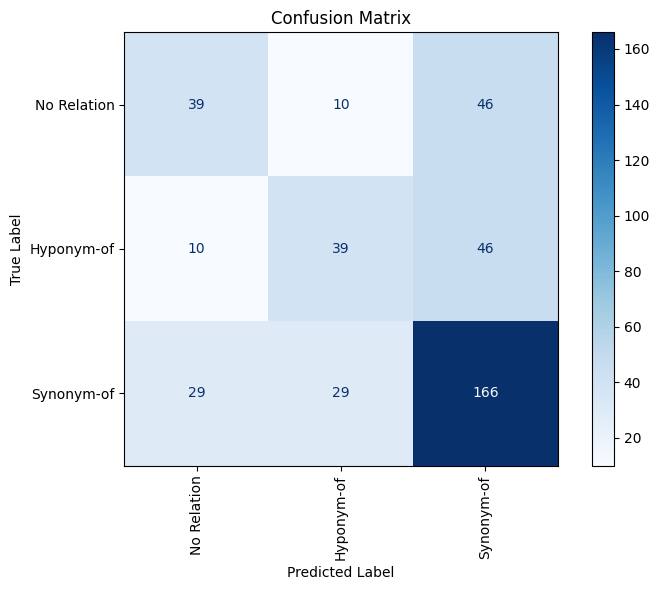

In [13]:
# Prediction
y_pred = classifier.predict(X_test)

# Evaluation
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Relation", "Hyponym-of", "Synonym-of"])
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')

# Customize plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show plot
plt.tight_layout()
plt.show()

In [11]:
cr = classification_report(y_test, y_pred ,target_names=["No Relation","Hyponym-of","Synonym-of"])
print(cr)

print("F1 Scores : ", f1_score(y_test, y_pred, average="macro"))
print("Recall Score : ", recall_score(y_test, y_pred, average="macro"))
print("Precision Score : ", precision_score(y_test, y_pred, average="macro"))

              precision    recall  f1-score   support

 No Relation       0.50      0.41      0.45        95
  Hyponym-of       0.50      0.41      0.45        95
  Synonym-of       0.64      0.74      0.69       224

    accuracy                           0.59       414
   macro avg       0.55      0.52      0.53       414
weighted avg       0.58      0.59      0.58       414

F1 Scores :  0.5301769281813894
Recall Score :  0.5207080200501254
Precision Score :  0.5478036175710594
